# Average Number of Friends by Age

The data used for this exercise can be found at datasets/fakefriends.csv. This data simulates the data from a social network, and each of its rows contains the following fields: user id, name, age and the number of friends.

NOTE: THIS DATA WAS RANDOMLY GENERATED, THUS THE READER SHOULD NOT TRY TO GIVE ANY INTERPRETATION TO THE RESULTS DERIVED FROM IT.

In this notebook we use PySpark to calculate the average number of friends by age in this fake social network.

First, we call some libraries and tell the computer that we are going to run the script on our local system.

In [1]:
# These two libraries will only be used for plotting our results
import numpy as np
import matplotlib.pyplot as plt

import pyspark
from pyspark import SparkConf, SparkContext

conf = SparkConf().setMaster("local").setAppName("num_friends_by_age")
sc = SparkContext(conf = conf)

Let's load our data and display a little sample of it.

In [2]:
raw_data = sc.textFile('../datasets/fakefriends.csv')

for row in raw_data.take(10):
    print(row)

0,Will,33,385
1,Jean-Luc,26,2
2,Hugh,55,221
3,Deanna,40,465
4,Quark,68,21
5,Weyoun,59,318
6,Gowron,37,220
7,Will,54,307
8,Jadzia,38,380
9,Hugh,27,181


Now, we must define a function to split the rows of our data and to keep only the fields we are interested in

In [3]:
def split_data(row):
    splitted_row = row.split(',')
    # Returns just the age and the numer of friends
    age = int(splitted_row[2])
    number_friends = int(splitted_row[3])    
    return (age, number_friends)

In the next cell we create a new RDD whose keys and values respectively consist of each user's age and number of friends.

In [4]:
data = raw_data.map(split_data)

With the next block of code we sum the number of friends and count the number of users by age. Again, we print a sample of this new RDD

In [5]:
total_by_age = data.mapValues(lambda num_friends: (num_friends, 1)).reduceByKey(lambda val_1, val_2: (val_1[0] + val_2[0], val_1[1] + val_2[1]))

for row in total_by_age.take(10):
    print(row)

(33, (3904, 12))
(26, (4115, 17))
(55, (3842, 13))
(40, (4264, 17))
(68, (2696, 10))
(59, (1980, 9))
(37, (2244, 9))
(54, (3615, 13))
(38, (2903, 15))
(27, (1825, 8))


We calculate the average number of friends and print our results

In [6]:
average_by_age = total_by_age.mapValues(lambda val: int(val[0] / val[1])).sortByKey()
averages = average_by_age.collect()

for average in averages:
    print(average)

(18, 343)
(19, 213)
(20, 165)
(21, 350)
(22, 206)
(23, 246)
(24, 233)
(25, 197)
(26, 242)
(27, 228)
(28, 209)
(29, 215)
(30, 235)
(31, 267)
(32, 207)
(33, 325)
(34, 245)
(35, 211)
(36, 246)
(37, 249)
(38, 193)
(39, 169)
(40, 250)
(41, 268)
(42, 303)
(43, 230)
(44, 282)
(45, 309)
(46, 223)
(47, 233)
(48, 281)
(49, 184)
(50, 254)
(51, 302)
(52, 340)
(53, 222)
(54, 278)
(55, 295)
(56, 306)
(57, 258)
(58, 116)
(59, 220)
(60, 202)
(61, 256)
(62, 220)
(63, 384)
(64, 281)
(65, 298)
(66, 276)
(67, 214)
(68, 269)
(69, 235)


Finally let's plot the results

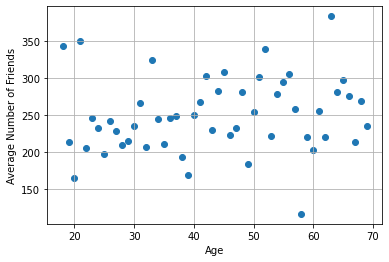

In [7]:
averages = np.array(averages)

ages = averages[:, 0]
ave_num_friends = averages[:, 1]

plt.scatter(ages, ave_num_friends)
plt.grid()
plt.xlabel('Age')
plt.ylabel('Average Number of Friends')
plt.show()